# Hopfield Network

In [1]:
import numpy as np

def train_hopfield(patterns, size):
    weights = np.zeros((size, size))
    for pattern in patterns:
        pattern = np.reshape(pattern, (size, 1))
        weights += np.dot(pattern, pattern.T)
    np.fill_diagonal(weights, 0)
    return weights

def recall_pattern(weights, pattern, steps=10):
    pattern = np.reshape(pattern, (weights.shape[0], 1))
    for _ in range(steps):
        pattern = np.sign(np.dot(weights, pattern))
    return pattern.flatten()

patterns = np.array([[-1, 1, -1, 1], [1, -1, 1, -1]])
size = 4
weights = train_hopfield(patterns, size)

test_pattern = np.array([-1, 1, -1, -1])
recalled_pattern = recall_pattern(weights, test_pattern)
print("Original Pattern: ", test_pattern)
print("Recalled Pattern:", recalled_pattern)

Original Pattern:  [-1  1 -1 -1]
Recalled Pattern: [-1.  1. -1.  1.]


# Universal Approximation Theorem

In [23]:
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.2 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.5 which is incompatible.


2025-04-23 10:48:12.365386: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-23 10:48:12.365409: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-23 10:48:12.365414: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-23 10:48:12.365446: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-23 10:48:12.365456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-23 10:48:12.682807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Epoch 0 Loss 2.69912696
Epoch 100 Loss 0.408605129
Epoch 200 Loss 0.379147798
Epoch 300 Loss 0.302845687
Epoch 400 Loss 0.22440578
Epoch 500 Loss 0.212493211
Epoch 600 Loss 0.210815296
Epoch 700 Loss 0.210375533
Epoch 800 Loss 0.210263371
Epoch 900 Loss 0.210136488


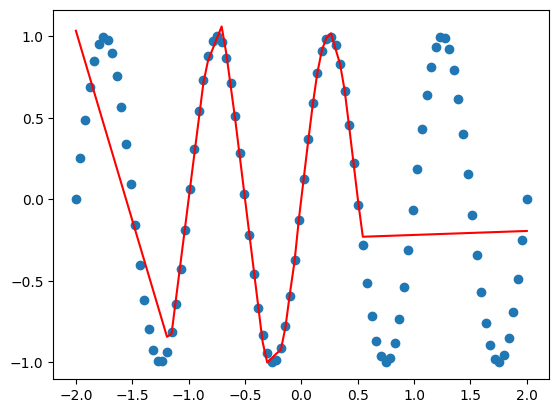

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x)

x_train = tf.constant(x, dtype=tf.float32)
y_train = tf.constant(y, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([1, 10]))
b1 = tf.Variable(tf.zeros([10]))
w2 = tf.Variable(tf.random.normal([10, 10]))
b2 = tf.Variable(tf.zeros([10]))
w3 = tf.Variable(tf.random.normal([10, 1]))
b3 = tf.Variable(tf.zeros([1]))

optimizer = tf.keras.optimizers.Adam(0.01)
mse = tf.keras.losses.MeanSquaredError()

@tf.function
def forward(x):
    x = tf.nn.relu(tf.matmul(x, w1) + b1)
    x = tf.nn.relu(tf.matmul(x, w2) + b2)
    return tf.matmul(x, w3) + b3

for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = forward(x_train)
        loss = mse(y_train, y_pred)
    grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
    optimizer.apply_gradients(zip(grads, [w1, b1, w2, b2, w3, b3]))
    if epoch % 100 == 0:
        tf.print("Epoch", epoch, "Loss", loss)

y_pred = forward(x_train).numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")
plt.show()


Epoch 0, Loss: 3.3299810886383057
Epoch 100, Loss: 0.36802875995635986
Epoch 200, Loss: 0.3570862114429474
Epoch 300, Loss: 0.33381161093711853
Epoch 400, Loss: 0.29889214038848877
Epoch 500, Loss: 0.25251948833465576
Epoch 600, Loss: 0.2137734591960907
Epoch 700, Loss: 0.1934375911951065
Epoch 800, Loss: 0.16851358115673065
Epoch 900, Loss: 0.1324758380651474


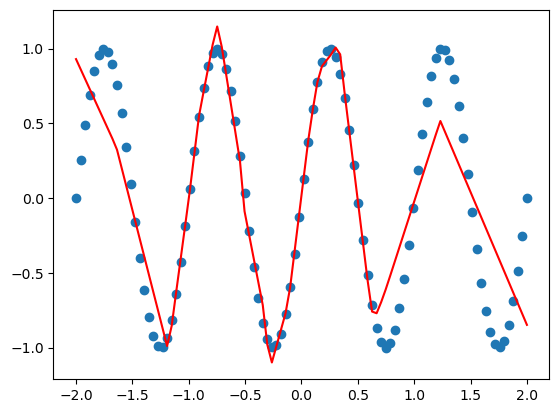

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def forward(x, params):
    x = torch.relu(torch.matmul(x, params['w1']) + params['b1'])
    x = torch.relu(torch.matmul(x, params['w2']) + params['b2'])
    x = torch.matmul(x, params['w3']) + params['b3']
    return x

x = np.linspace(-2, 2, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x)

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

params = {
    'w1': torch.randn(1, 10, requires_grad=True),
    'b1': torch.zeros(10, requires_grad=True),
    'w2': torch.randn(10, 10, requires_grad=True),
    'b2': torch.zeros(10, requires_grad=True),
    'w3': torch.randn(10, 1, requires_grad=True),
    'b3': torch.zeros(1, requires_grad=True)
}

optimizer = optim.Adam(params.values(), lr=0.01)
criterion = nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = forward(x_train, params)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

y_pred = forward(x_train, params).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")
plt.show()
